## Importing libraries

In [1]:
# https://www.codegrepper.com/code-examples/python/pandas+disable+warnings (for the report)
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Loading files and data manipulation

### Reading and cleaning the females dataset

In [2]:
# reading and cleaning the females dataset
females = pd.read_json('females.json')

# https://stackoverflow.com/questions/62343093/remove-empty-string-from-a-list-of-strings
females['prompts_replied'] = [len(list(filter(None, sublist))) for sublist in females['prompts']]
females = females.drop(['id', 'prompts'], 1)

females['gender'] = 'Female'

females['bio_length'] = females['bio'].str.split('').str.len()
females['bio_length'] = females['bio_length'].replace('', 0).astype('int')
females['bio_length'][females.bio_length == 2] = 0

females.head()

,gender,bio,interests,anthem,prompts_replied,bio_length
0,Female,Instagram- leonor_ortizzz,"[Coffee, Activism, Foodie, Music, Movies]",,0,27
1,Female,"lover of avocados, coconuts, and one too many ...","[Fashion, Karaoke, Museum, Brunch, Volunteering]","OPEN A WINDOW (feat. Tyler, The Creator)",1,60
2,Female,mommy issue haver costco hotdog enthusiast goo...,"[Foodie, Music, Karaoke, Dog lover, Comedy]",Fair Trade (with Travis Scott),3,63
3,Female,Follow my new insta page: angelisse_req Im 18 ...,"[Foodie, Tattoos, Sports, Astrology, Spiritual...",,0,75
4,Female,"they/she. from bushwick, and 420 friendly. :) ...","[Photography, Black Lives Matter, Movies, Musi...",Wolfcat,2,112


### Reading and cleaning the males dataset

In [3]:
males = pd.read_json('males.json')

# https://stackoverflow.com/questions/62343093/remove-empty-string-from-a-list-of-strings
males['prompts_replied'] = [len(list(filter(None, sublist))) for sublist in males['prompts']]

males = males.drop(['id', 'prompts'], 1)

males['gender'] = 'Male'

males['bio_length'] = males['bio'].str.split('').str.len()
males['bio_length'] = males['bio_length'].replace('', 0).astype('int')

males['bio_length'][males.bio_length == 2] = 0

males.head()

,gender,bio,interests,anthem,prompts_replied,bio_length
0,Male,Jmu baseball 26 Don Bosco Prep 22,[Working out],,0,36
1,Male,,"[Outdoors, Netflix, Comedy, Hiking]",,0,0
2,Male,,"[Movies, Tattoos, Working out, Music, Sports]",,3,0
3,Male,I workout in the morning so the rest of the da...,"[Travel, Music, Working out]",Hurricane,0,114
4,Male,,[Coffee],,0,0


### Combining both dataframes, and further cleaning

In [4]:
# joining male and female datasets
profiles = females.append(males)
profiles = profiles.replace('',np.nan)

profiles['num_interests'] = profiles['interests'].str.len()
profiles['num_interests'] = profiles['num_interests'].replace(np.nan, 0)
profiles['num_interests'] = profiles['num_interests'].astype('int')

profiles.head()

,gender,bio,interests,anthem,prompts_replied,bio_length,num_interests
0,Female,Instagram- leonor_ortizzz,"[Coffee, Activism, Foodie, Music, Movies]",NaN,0,27,5
1,Female,"lover of avocados, coconuts, and one too many ...","[Fashion, Karaoke, Museum, Brunch, Volunteering]","OPEN A WINDOW (feat. Tyler, The Creator)",1,60,5
2,Female,mommy issue haver costco hotdog enthusiast goo...,"[Foodie, Music, Karaoke, Dog lover, Comedy]",Fair Trade (with Travis Scott),3,63,5
3,Female,Follow my new insta page: angelisse_req Im 18 ...,"[Foodie, Tattoos, Sports, Astrology, Spiritual...",NaN,0,75,5
4,Female,"they/she. from bushwick, and 420 friendly. :) ...","[Photography, Black Lives Matter, Movies, Musi...",Wolfcat,2,112,5


### Additional information from the `profiles` dataset

In [5]:
'''
Other things we can look at here have the following information:
profiles.describe() - has mean, std, min, max, etc of prompts_replied, bio_length, and num_interests
profiles.info() - tells us 'non-null' count for all columns, and the dtype
profiles.count() - gives us what profile.info() does but without a lot of the clutter
'''

"\nOther things we can look at here have the following information:\nprofiles.describe() - has mean, std, min, max, etc of prompts_replied, bio_length, and num_interests\nprofiles.info() - tells us 'non-null' count for all columns, and the dtype\nprofiles.count() - gives us what profile.info() does but without a lot of the clutter\n"

## Ascertaining information about most common interests

In [6]:
from collections import Counter

def getMostCommonInterest(df):
    '''finding the most common interest for all genders'''
    interests = []
    for profile_interest_list in df.interests:
        interests += profile_interest_list
    c = Counter(interests)
    return c.most_common(5)

def generatePie(df, explode: tuple):
    '''reusing code to plot a pie chart with a given dataframe and burst tuple for effects'''
    plot = getMostCommonInterest(df)
    ndf = pd.DataFrame(plot, columns=['Interest', 'Frequency'])

    plt.pie(ndf['Frequency'],labels=ndf['Interest'], explode=explode, shadow=True, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.show()


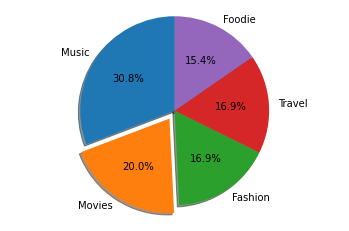

In [7]:
generatePie(females, (0, 0.1, 0, 0, 0))


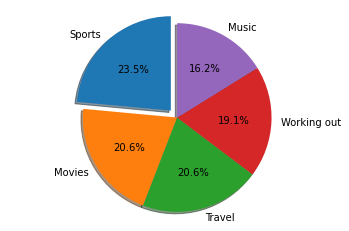

In [8]:
generatePie(males, (0.1, 0, 0, 0, 0))

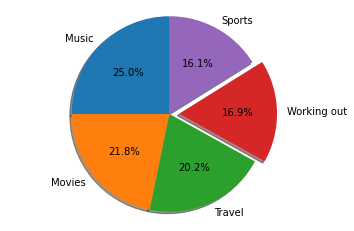

In [9]:
generatePie(profiles, (0, 0, 0, 0.1, 0))

## Ascertaining information about those who chose to fill out the optional prompts

In [16]:
'''We want to show the count of people with 3, 2, 1, and 0 answers, and then graph them'''
profiles.prompts_replied.value_counts()

0    54
3    17
2    17
1    12
Name: prompts_replied, dtype: int64

<AxesSubplot:>

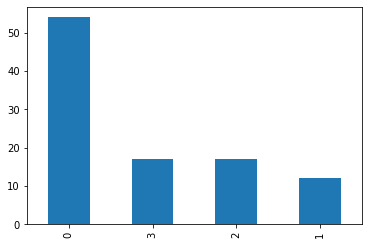

In [20]:
'''and then plot them (neaten it up)'''
profiles['prompts_replied'].value_counts().plot(kind='bar')